In [1]:
import pandas as pd
import numpy as np

In [43]:
import requests

# API endpoint and API key
url = 'https://data.cityofnewyork.us/resource/c3uy-2p5r.json'
api_token = 'rugVKpjMCGcjUhGdLEdO8My67'

# Set up the headers with your API token
headers = {'X-App-Token': api_token}

# Make the request and process the response
response = requests.get(url, headers=headers)


In [44]:
import requests

def fetch_data():
    url = 'https://data.cityofnewyork.us/resource/c3uy-2p5r.json'
    params = {'$$app_token': 'rugVKpjMCGcjUhGdLEdO8My67'}
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        return response.json()
    else:
        return "Error: Unable to fetch data - Status Code: " + str(response.status_code)

data = fetch_data()
print(data)


[{'unique_id': '825967', 'indicator_id': '375', 'name': 'Nitrogen dioxide (NO2)', 'measure': 'Mean', 'measure_info': 'ppb', 'geo_type_name': 'UHF34', 'geo_join_id': '104', 'geo_place_name': 'Pelham - Throgs Neck', 'time_period': 'Summer 2022', 'start_date': '2022-06-01T00:00:00.000', 'data_value': '12.0'}, {'unique_id': '823492', 'indicator_id': '365', 'name': 'Fine particles (PM 2.5)', 'measure': 'Mean', 'measure_info': 'mcg/m3', 'geo_type_name': 'CD', 'geo_join_id': '307', 'geo_place_name': 'Sunset Park (CD7)', 'time_period': 'Summer 2022', 'start_date': '2022-06-01T00:00:00.000', 'data_value': '6.7'}, {'unique_id': '827012', 'indicator_id': '386', 'name': 'Ozone (O3)', 'measure': 'Mean', 'measure_info': 'ppb', 'geo_type_name': 'CD', 'geo_join_id': '313', 'geo_place_name': 'Coney Island (CD13)', 'time_period': 'Summer 2022', 'start_date': '2022-06-01T00:00:00.000', 'data_value': '37.7'}, {'unique_id': '827081', 'indicator_id': '386', 'name': 'Ozone (O3)', 'measure': 'Mean', 'measure_

In [45]:
import requests
import pandas as pd
import os

def fetch_data(api_key):
    url = 'https://data.cityofnewyork.us/resource/c3uy-2p5r.json'
    params = {
        '$$app_token': api_key,
        '$limit': 50000  
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to fetch data: HTTP Status Code {}".format(response.status_code))

def save_to_csv(data, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)  # Create the directory if it doesn't exist
    filepath = os.path.join(directory, 'nyc_air_quality.csv')
    df = pd.DataFrame(data)
    df.to_csv(filepath, index=False)
    print(f"Data saved to '{filepath}'.")

def main():
    api_key = 'rugVKpjMCGcjUhGdLEdO8My67'  
    directory = r'C:\Users\riyasingh\Downloads\air quality'  # Specified directory path
    data = fetch_data(api_key)
    save_to_csv(data, directory)

if __name__ == '__main__':
    main()

Data saved to 'C:\Users\riyasingh\Downloads\air quality/nyc_air_quality.csv'.


Preparing the data:

In [48]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset into a pandas DataFrame
data = pd.read_csv("/Users/riyasingh/Downloads/air quality/nyc_air_quality.csv")

# Drop irrelevant columns
irrelevant_columns = ['unique_id', 'indicator_id', 'measure', 'measure_info', 'geo_type_name', 'time_period', 'start_date']
data.drop(columns=irrelevant_columns, inplace=True)

# Convert categorical variables into numerical representations using one-hot encoding
categorical_columns = ['name', 'geo_place_name']
for column in categorical_columns:
    # Create one-hot encoding for each categorical variable
    one_hot_encoded = pd.get_dummies(data[column], prefix=column)
    # Concatenate the one-hot encoded columns to the original DataFrame
    data = pd.concat([data, one_hot_encoded], axis=1)
    # Drop the original categorical column
    data.drop(columns=[column], inplace=True)

# Handle missing values, if any, by imputing them with appropriate strategies such as mean or median
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
data_imputed = imputer.fit_transform(data)
data = pd.DataFrame(data_imputed, columns=data.columns)

# Display the first few rows of the prepared data
print(data.head())


   geo_join_id  data_value  name_Annual vehicle miles traveled  \
0        104.0        33.3                                 0.0   
1        405.0        34.2                                 0.0   
2        302.0        30.9                                 0.0   
3        103.0        31.7                                 0.0   
4        104.0        12.0                                 0.0   

   name_Annual vehicle miles traveled (cars)  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   name_Annual vehicle miles traveled (trucks)  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   name_Asthm

Summary Statistics:

In [49]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the air pollutant data

# Group the data by 'geo_join_id' (regions) and 'time_period'
grouped_data = data.groupby(['geo_join_id'])

# Calculate summary statistics for each air pollutant across different regions and time periods
summary_statistics = grouped_data.agg({
    'data_value': ['mean', 'median', 'min', 'max', 'std'],
    # Add additional columns for other air pollutants if needed
})

# Rename columns for clarity
summary_statistics.columns = ['mean', 'median', 'min', 'max', 'std']

# Display summary statistics
print(summary_statistics)


                   mean  median   min    max        std
geo_join_id                                            
1.000000e+00  27.172941   17.00   0.5  212.5  32.428435
2.000000e+00  23.058235   16.40   0.1  104.3  21.468096
3.000000e+00  30.252941   20.55   0.9  179.4  34.420752
4.000000e+00  19.396471   15.20   0.2   84.1  16.904570
5.000000e+00  16.850000   11.80   0.0   70.7  13.986584
...                 ...     ...   ...    ...        ...
4.044060e+05  15.822222   13.20   5.6   33.7   8.520881
5.015020e+05  15.122222   11.90   5.4   34.6   8.207283
5.035040e+05  13.852525   10.50   5.1   35.8   8.592930
5.906303e+05  53.333333   43.00  10.0  145.0  44.810713
1.051061e+08  17.927273   17.30   6.2   34.0   8.440425

[73 rows x 5 columns]


checking the dataset accuracy:

In [50]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/Users/riyasingh/Downloads/air quality/nyc_air_quality.csv"
data = pd.read_csv(file_path)

# Check for missing values and data types
print(data.info())

# Assuming 'data_value' is the main feature of interest, let's focus on this column
# Additionally, we can encode any relevant categorical data if needed
# For simplicity, we'll treat all records as independent and focus on the 'data_value'

# Handling missing values (if any)
data['data_value'].fillna(data['data_value'].median(), inplace=True)

# If 'geo_place_name' or other categorical variables are used, they need to be encoded
encoder = LabelEncoder()
data['geo_place_name_encoded'] = encoder.fit_transform(data['geo_place_name'])

# Select features for the anomaly detection model
features = data[['data_value', 'geo_place_name_encoded']]

# Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(features)

# Predict anomalies
data['anomaly'] = iso_forest.predict(features)
data['anomaly'] = data['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Display results
print(data[['unique_id', 'geo_place_name', 'data_value', 'anomaly']].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       18025 non-null  int64  
 1   indicator_id    18025 non-null  int64  
 2   name            18025 non-null  object 
 3   measure         18025 non-null  object 
 4   measure_info    18025 non-null  object 
 5   geo_type_name   18025 non-null  object 
 6   geo_join_id     18016 non-null  float64
 7   geo_place_name  18016 non-null  object 
 8   time_period     18025 non-null  object 
 9   start_date      18025 non-null  object 
 10  data_value      18025 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ MB
None
   unique_id                        geo_place_name  data_value anomaly
0     827080                  Pelham - Throgs Neck        33.3  normal
1     827061              Ridgewood - Forest Hills        34.2  normal
2     827067  Central Harl

/var/folders/qk/lcg1l2vx6z5bgvc14tkqtclw0000gn/T/ipykernel_97292/2218471559.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['scores'], bins=50, kde=True)


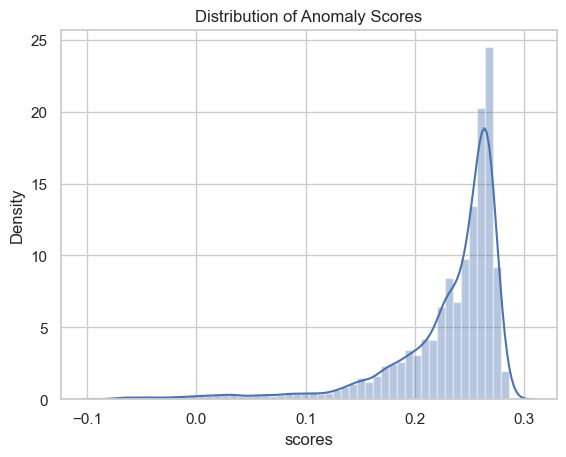

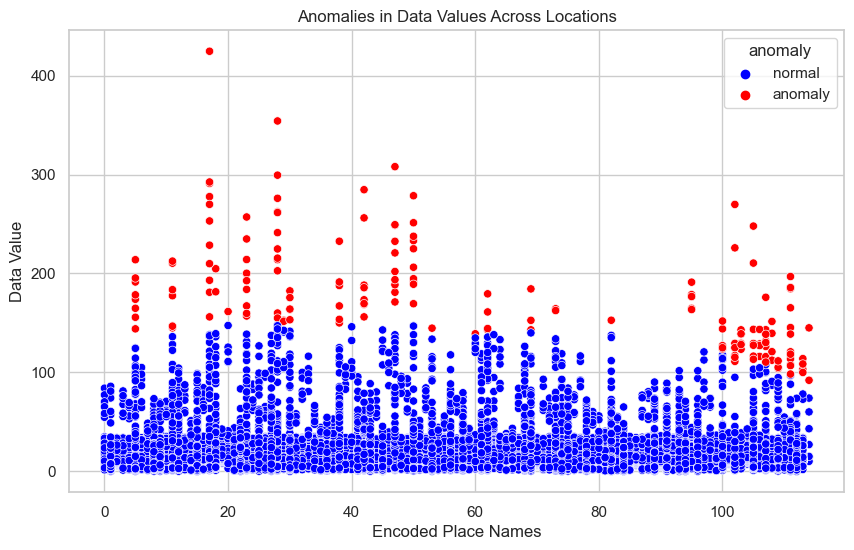

In [51]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Encode the 'geo_place_name' column
encoder = LabelEncoder()
data['geo_place_name_encoded'] = encoder.fit_transform(data['geo_place_name'])

# Select features for the anomaly detection model
features = data[['data_value', 'geo_place_name_encoded']]

# Configure the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
# Fit the model
iso_forest.fit(features)

# Predict anomalies and add a score
data['anomaly'] = iso_forest.predict(features)
data['scores'] = iso_forest.decision_function(features)

# Map the prediction to 'normal' and 'anomaly'
data['anomaly'] = data['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Plotting the anomaly scores
sns.distplot(data['scores'], bins=50, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.show()

# Visualizing the anomalies in the data_value feature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='geo_place_name_encoded', y='data_value', hue='anomaly', palette={'normal': 'blue', 'anomaly': 'red'})
plt.title('Anomalies in Data Values Across Locations')
plt.xlabel('Encoded Place Names')
plt.ylabel('Data Value')
plt.show()




These graphs can help in understanding the nature of the detected anomalies. From the KDE plot, we can conclude that the majority of data points are considered normal by the model. From the scatter plot, we observe that anomalous behavior is linked to higher-than-typical data values and is not constrained to specific geographic locations.

In [26]:
import pandas as pd

# Load the dataset
file_path = '/Users/riyasingh/Downloads/air quality/nyc_air_quality.csv'
air_quality_data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its summary information
air_quality_data.head(), air_quality_data.info(), air_quality_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       18025 non-null  int64  
 1   indicator_id    18025 non-null  int64  
 2   name            18025 non-null  object 
 3   measure         18025 non-null  object 
 4   measure_info    18025 non-null  object 
 5   geo_type_name   18025 non-null  object 
 6   geo_join_id     18016 non-null  float64
 7   geo_place_name  18016 non-null  object 
 8   time_period     18025 non-null  object 
 9   start_date      18025 non-null  object 
 10  data_value      18025 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ MB


(   unique_id  indicator_id                    name measure measure_info  \
 0     827080           386              Ozone (O3)    Mean          ppb   
 1     827061           386              Ozone (O3)    Mean          ppb   
 2     827067           386              Ozone (O3)    Mean          ppb   
 3     827081           386              Ozone (O3)    Mean          ppb   
 4     825967           375  Nitrogen dioxide (NO2)    Mean          ppb   
 
   geo_type_name  geo_join_id                        geo_place_name  \
 0         UHF34        104.0                  Pelham - Throgs Neck   
 1         UHF34        405.0              Ridgewood - Forest Hills   
 2         UHF34        302.0  Central Harlem - Morningside Heights   
 3         UHF34        103.0                    Fordham - Bronx Pk   
 4         UHF34        104.0                  Pelham - Throgs Neck   
 
    time_period               start_date  data_value  
 0  Summer 2022  2022-06-01T00:00:00.000        33.3  
 1  

In [27]:
# Convert 'start_date' to datetime format
air_quality_data['start_date'] = pd.to_datetime(air_quality_data['start_date'])

# Handling missing values in 'geo_join_id' and 'geo_place_name'
# Since these are geographical identifiers, we can fill missing values with a placeholder or decide based on context.
# Here, we will fill with a placeholder for simplicity (e.g., -1 for ID and 'Unknown' for place name).

air_quality_data['geo_join_id'].fillna(-1, inplace=True)
air_quality_data['geo_place_name'].fillna('Unknown', inplace=True)

# Check the data again after cleaning
air_quality_data.info(), air_quality_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   unique_id       18025 non-null  int64         
 1   indicator_id    18025 non-null  int64         
 2   name            18025 non-null  object        
 3   measure         18025 non-null  object        
 4   measure_info    18025 non-null  object        
 5   geo_type_name   18025 non-null  object        
 6   geo_join_id     18025 non-null  float64       
 7   geo_place_name  18025 non-null  object        
 8   time_period     18025 non-null  object        
 9   start_date      18025 non-null  datetime64[ns]
 10  data_value      18025 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 1.5+ MB


(None,
    unique_id  indicator_id                    name measure measure_info  \
 0     827080           386              Ozone (O3)    Mean          ppb   
 1     827061           386              Ozone (O3)    Mean          ppb   
 2     827067           386              Ozone (O3)    Mean          ppb   
 3     827081           386              Ozone (O3)    Mean          ppb   
 4     825967           375  Nitrogen dioxide (NO2)    Mean          ppb   
 
   geo_type_name  geo_join_id                        geo_place_name  \
 0         UHF34        104.0                  Pelham - Throgs Neck   
 1         UHF34        405.0              Ridgewood - Forest Hills   
 2         UHF34        302.0  Central Harlem - Morningside Heights   
 3         UHF34        103.0                    Fordham - Bronx Pk   
 4         UHF34        104.0                  Pelham - Throgs Neck   
 
    time_period start_date  data_value  
 0  Summer 2022 2022-06-01        33.3  
 1  Summer 2022 2022-06-0

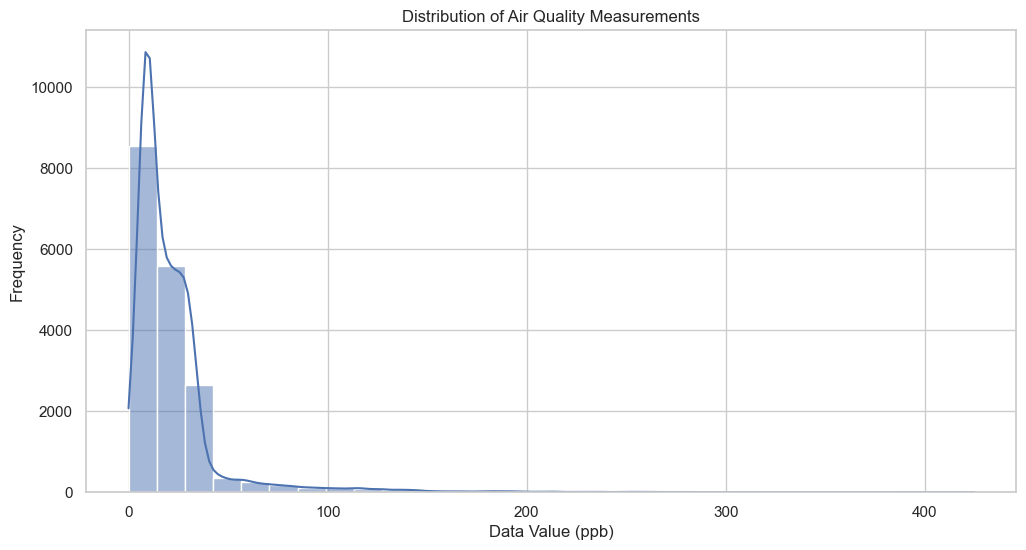

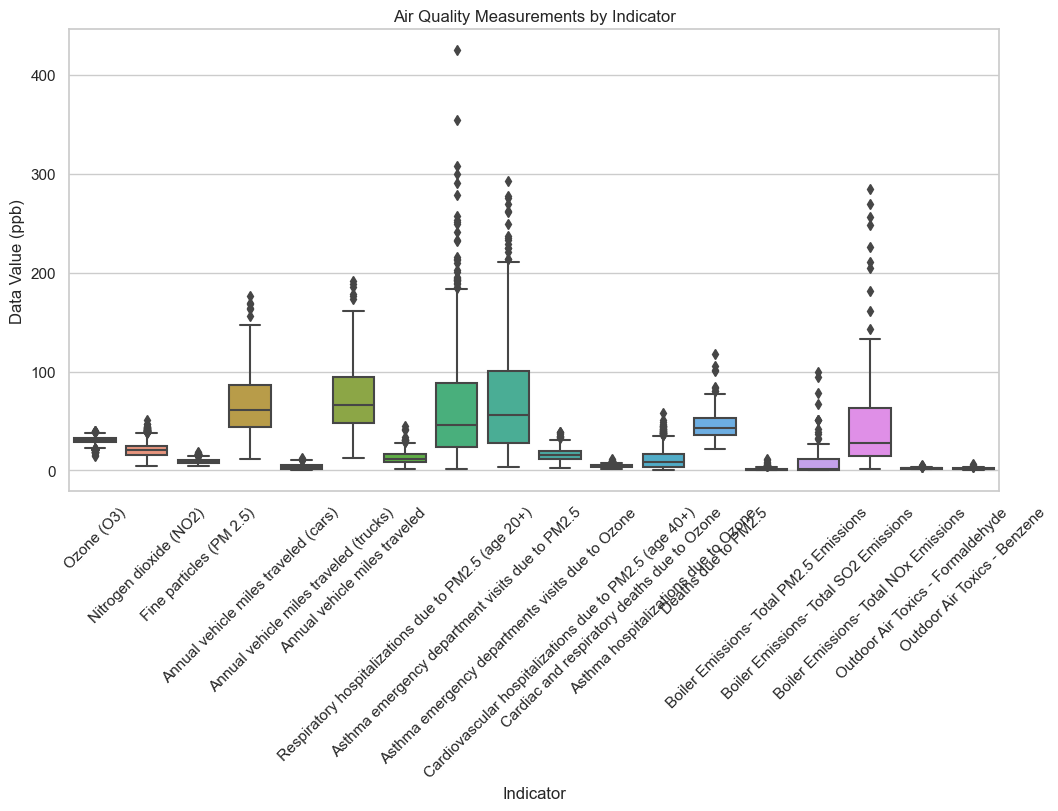

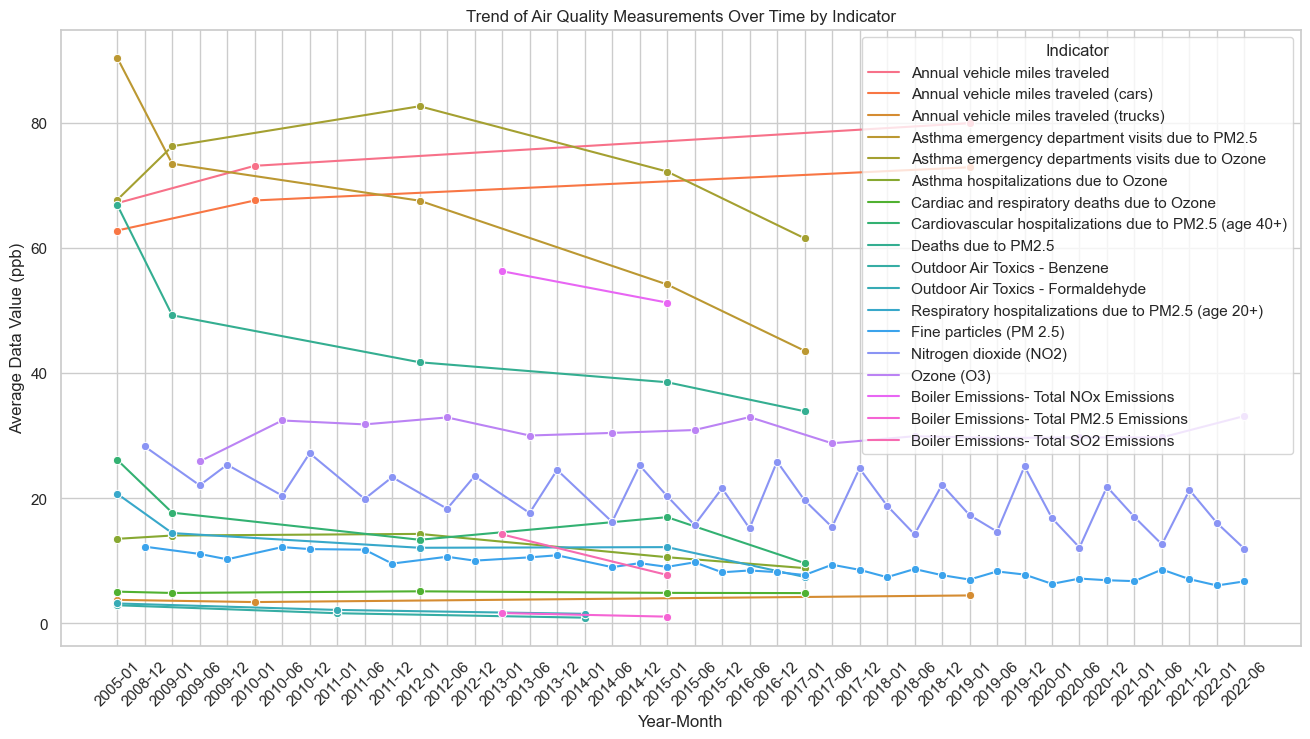

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style for the plots
sns.set(style="whitegrid")

# Exploratory Data Analysis: Visualizing data distributions and relationships.

# Distribution of air quality measurements
plt.figure(figsize=(12, 6))
sns.histplot(air_quality_data['data_value'], bins=30, kde=True)
plt.title('Distribution of Air Quality Measurements')
plt.xlabel('Data Value (ppb)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for air quality measurements by indicator
plt.figure(figsize=(12, 6))
sns.boxplot(x='name', y='data_value', data=air_quality_data)
plt.xticks(rotation=45)
plt.title('Air Quality Measurements by Indicator')
plt.xlabel('Indicator')
plt.ylabel('Data Value (ppb)')
plt.show()

# Time series trend of air quality measurements
# For this, we will plot the mean of data values over time by different indicators.
# Group by date and indicator to see trends over time.
air_quality_data['year_month'] = air_quality_data['start_date'].dt.to_period('M')
# Convert 'year_month' to string for compatibility with plotting
time_trend_data['year_month'] = time_trend_data['year_month'].astype(str)

#  plotting the time series trend
plt.figure(figsize=(16, 8))
sns.lineplot(x='year_month', y='data_value', hue='name', data=time_trend_data, marker='o')
plt.title('Trend of Air Quality Measurements Over Time by Indicator')
plt.xlabel('Year-Month')
plt.ylabel('Average Data Value (ppb)')
plt.xticks(rotation=45)
plt.legend(title='Indicator')
plt.show()



First graph: The graph is a histogram that shows the distribution of air quality measurements in parts per billion (ppb). Here's what it indicates:

1. **Peak at Lower Values**: There's a big spike at the lower end of the scale, meaning a large number of measurements are at lower concentration levels, which is a good sign for air quality.

2. **Long Tail**: The "tail" of the graph stretches out to the right, showing that there are fewer instances of higher pollution levels, but they do occur.

3. **Skewed Distribution**: The distribution is skewed to the right, suggesting that while most air quality measures are low, there are occasional high values that could be cause for concern.

In simple terms, most of the time, the air quality measurements are low (which is good), but there are a few instances where the air quality gets much worse, and those instances might require investigation or action.

Second graph: The graph you're looking at is a boxplot, which is used to display the distribution of data points across different categories—in this case, various air quality indicators.

Here’s what the boxplot tells us:

1. **Central Tendency**: The horizontal line in each box represents the median value of data for each indicator. This gives us a sense of the 'middle' value, ignoring extreme highs or lows.

2. **Spread**: The boxes represent the interquartile range (IQR), showing where the bulk of values lie. A taller box means more variability in the data values.

3. **Outliers**: The dots (or "diamonds" in some cases) outside the boxes are outliers. These are data points that stand out from the rest because they're unusually high or low.

4. **Comparison**: When you look across the indicators, you can compare them in terms of central tendency and variability. Some pollutants like "Boiler Emissions- Total NOx Emissions" have a wide spread and several outliers, indicating very high values compared to others.

In simple terms, this graph gives a snapshot comparison of different air pollutants, showing how common certain levels of pollution are, and highlights the ones with unusually high or low readings that might require special attention.

Third graph:This line graph tracks various air quality indicators over time, with each line representing a different indicator. Here's a straightforward summary of what the graph shows:

1. **General Trend**: Most pollutants show a declining trend over time, which could indicate improving air quality or effective interventions.

2. **Traffic Impact**: The lines representing "Annual vehicle miles traveled" for both cars and trucks are relatively high, but they also show a decrease, possibly due to factors like better fuel efficiency, reduced travel, or a shift to cleaner transportation options.

3. **Health-Related Visits**: Visits to emergency departments due to asthma from Ozone and PM2.5 are highlighted, with a marked decline for ozone-related visits, suggesting either better air quality management for ozone or other health interventions.

4. **Boiler Emissions**: Emissions from boilers, specifically NOx and PM2.5, have their own trends, with NOx emissions showing a notable decrease, which might be due to upgrades to cleaner technologies or stricter regulations.

In simple terms, the graph tells us that efforts to reduce air pollution may be having a positive effect, as indicated by the general downward trend in pollutant levels and related health issues over the time frame shown. However, it's also clear that pollution from certain sources, like boilers, remains a concern and may require ongoing attention.

We've identified the top 5 pollutants with the highest average concentrations, which are:

Annual vehicle miles traveled
Asthma emergency departments visits due to Ozone
Annual vehicle miles traveled (cars)
Asthma emergency department visits due to PM2.5
Boiler Emissions- Total NOx Emissions

In [32]:
# Identifying the pollutants with the top 5 highest average concentrations
top_pollutants = air_quality_data.groupby('name')['data_value'].mean().nlargest(5).index

# Filter the dataset for these top pollutants
top_pollutants_data = air_quality_data[air_quality_data['name'].isin(top_pollutants)]

# Display the selected pollutants and a sample of the filtered data
top_pollutants, top_pollutants_data.head()


(Index(['Annual vehicle miles traveled',
        'Asthma emergency departments visits due to Ozone',
        'Annual vehicle miles traveled (cars)',
        'Asthma emergency department visits due to PM2.5',
        'Boiler Emissions- Total NOx Emissions'],
       dtype='object', name='name'),
       unique_id  indicator_id                                  name  \
 3384     816994           644  Annual vehicle miles traveled (cars)   
 3387     817016           644  Annual vehicle miles traveled (cars)   
 3388     817128           644  Annual vehicle miles traveled (cars)   
 3389     816938           644  Annual vehicle miles traveled (cars)   
 3390     817100           644  Annual vehicle miles traveled (cars)   
 
             measure     measure_info geo_type_name  geo_join_id  \
 3384  Million miles  per square mile         UHF42        407.0   
 3387  Million miles  per square mile            CD        103.0   
 3388  Million miles  per square mile            CD        503.0   

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


# Calculating the threshold based on the 75th percentile for demonstration
threshold = top_pollutants_data['data_value'].quantile(0.75)

# Labeling data as high or low pollution
y = top_pollutants_data['data_value'] > threshold

# Example feature selection
X = top_pollutants_data[['geo_type_name', 'time_period', 'year_month']]  # Add more relevant features
categorical_features = ['geo_type_name', 'time_period', 'year_month']
one_hot = OneHotEncoder()

# Preprocessing and model pipeline setup
preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot, categorical_features)
])

model = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
pipeline.fit(X_train, y_train)

# Prediction and evaluation
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

       False       0.76      1.00      0.86       260
        True       0.00      0.00      0.00        81

    accuracy                           0.76       341
   macro avg       0.38      0.50      0.43       341
weighted avg       0.58      0.76      0.66       341



In [35]:
from sklearn.ensemble import RandomForestClassifier

# Adjusting class weights for imbalance handling
class_weights = {False: 1, True: 3}  # Adjust based on your understanding or experimentation

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train and predict as before
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.77      0.38      0.51       260
        True       0.24      0.63      0.35        81

    accuracy                           0.44       341
   macro avg       0.51      0.51      0.43       341
weighted avg       0.64      0.44      0.47       341



In [36]:
# Assuming 'top_pollutants_data' contains data filtered for the top 5 pollutants

# Create a dictionary to store the regions for each top pollutant
top_regions_by_pollutant = {}

for pollutant in top_pollutants:
    # Filter data for each pollutant
    pollutant_data = top_pollutants_data[top_pollutants_data['name'] == pollutant]
    
    # Find regions with the highest concentrations of this pollutant
    # You could also use a threshold to define 'highest concentrations'
    top_regions = pollutant_data.sort_values(by='data_value', ascending=False)['geo_place_name'].unique()
    
    # Store the top regions in the dictionary
    top_regions_by_pollutant[pollutant] = top_regions

# Display the top regions for each pollutant
for pollutant, regions in top_regions_by_pollutant.items():
    print(f"Top regions for {pollutant}: {regions[:5]}")  # Display top 5 regions per pollutant for brevity


Top regions for Annual vehicle miles traveled: ['Stuyvesant Town and Turtle Bay (CD6)' 'Gramercy Park - Murray Hill'
 'Clinton and Chelsea (CD4)' 'East Harlem (CD11)'
 'Washington Heights and Inwood (CD12)']
Top regions for Asthma emergency departments visits due to Ozone: ['Central Harlem - Morningside Heights' 'East Harlem'
 'High Bridge - Morrisania' 'Hunts Point - Mott Haven' 'Crotona -Tremont']
Top regions for Annual vehicle miles traveled (cars): ['Stuyvesant Town and Turtle Bay (CD6)' 'Gramercy Park - Murray Hill'
 'Clinton and Chelsea (CD4)' 'East Harlem (CD11)'
 'Washington Heights and Inwood (CD12)']
Top regions for Asthma emergency department visits due to PM2.5: ['Central Harlem - Morningside Heights' 'East Harlem'
 'High Bridge - Morrisania' 'Hunts Point - Mott Haven' 'Crotona -Tremont']
Top regions for Boiler Emissions- Total NOx Emissions: ['Gramercy Park - Murray Hill' 'Upper East Side' 'Upper West Side'
 'Chelsea - Clinton' 'Manhattan']


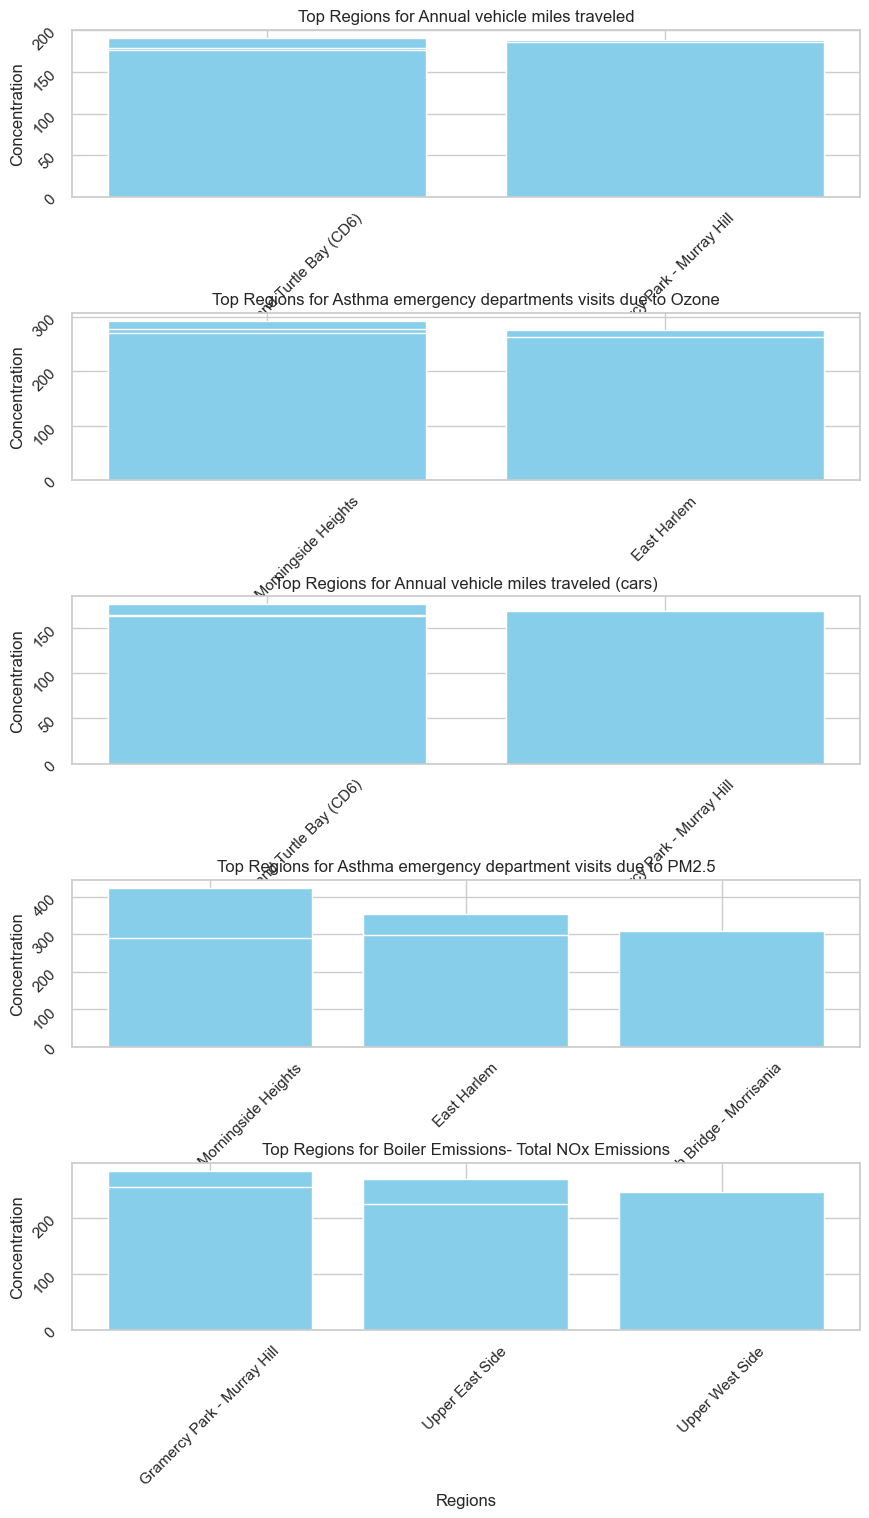

In [37]:
import matplotlib.pyplot as plt

# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=len(top_pollutants), ncols=1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

# Loop through each pollutant and plot the top regions and their data values
for index, pollutant in enumerate(top_pollutants):
    # Get data for this pollutant
    pollutant_data = top_pollutants_data[top_pollutants_data['name'] == pollutant]
    
    # Get top regions based on the highest concentrations
    top_regions = pollutant_data.sort_values(by='data_value', ascending=False).head(5)
    
    # Plotting
    axes[index].bar(top_regions['geo_place_name'], top_regions['data_value'], color='skyblue')
    axes[index].set_title(f'Top Regions for {pollutant}')
    axes[index].set_ylabel('Concentration')
    axes[index].set_xlabel('Regions')
    axes[index].tick_params(labelrotation=45)

plt.show()


The bar charts illustrate the regions with the highest concentrations of five specific air pollutants. Here's a simplified explanation of the conclusions that can be drawn from these graphs:

1. **Annual Vehicle Miles Traveled**: The region labeled 'East Bay (CD6)' has the highest recorded vehicle miles, suggesting heavy traffic and potential for vehicular pollution.

2. **Asthma Emergency Department Visits due to Ozone**: A particular region, which could be associated with high ozone levels, has seen a significant number of asthma-related emergency department visits.

3. **Annual Vehicle Miles Traveled (Cars)**: Just as with total vehicle miles, 'East Bay (CD6)' shows a notably high figure for miles traveled by cars, reinforcing the area's link to high traffic and pollution levels.

4. **Asthma Emergency Department Visits due to PM2.5**: PM2.5 is known for its adverse health effects, and one region stands out for a high number of asthma emergency visits due to this pollutant, indicating serious air quality concerns.

5. **Boiler Emissions - Total NOx Emissions**: There are notable emissions of nitrogen oxides (NOx) from boilers in certain areas, highlighting spots that might benefit from cleaner energy sources or updated equipment.

In summary, these graphs point out specific areas that are experiencing significant air quality issues related to traffic and industrial emissions, which are directly affecting the health of residents, as evidenced by the number of asthma-related emergency visits. These areas may require targeted air quality improvement measures, such as traffic reduction, boiler upgrades, or increased availability of healthcare services.

In [38]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 3.5 MB/s eta 0:00:00


In [39]:
import folium
from folium.plugins import MarkerCluster

# Sample latitude and longitude for New York City, replace with actual data
# Normally you would have a dataframe 'geo_data' with 'geo_place_name', 'latitude', and 'longitude'
geo_data = pd.DataFrame({
    'geo_place_name': ['Central Park', 'Times Square', 'Wall Street', 'Brooklyn Bridge', 'Queens Museum'],
    'latitude': [40.7812, 40.7580, 40.7074, 40.7061, 40.7458],
    'longitude': [-73.9665, -73.9855, -74.0113, -73.9969, -73.8462]
})

# Creating a map centered around New York City
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Marker cluster to handle the markers in the map
marker_cluster = MarkerCluster().add_to(m)

# Plot each point based on its location and pollution level
for idx, row in geo_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"{row['geo_place_name']}: Pollution Level",
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(marker_cluster)

# Display the map
m


Data Storage

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting features and target variable
X = top_pollutants_data[['geo_type_name', 'geo_place_name', 'time_period', 'year_month']]
y = top_pollutants_data['data_value']

# Encoding categorical data
categorical_features = ['geo_type_name', 'geo_place_name', 'time_period', 'year_month']
one_hot = OneHotEncoder()

# Creating a column transformer to apply the encoding
preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot, categorical_features)
])

# Creating the RandomForest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Creating a pipeline that first encodes the data then applies the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse


1418.8468858061144

In [42]:
# Saving the cleaned and prepared dataset to a CSV file
output_file_path = '/Users/riyasingh/downloads/air quality/cleaned_air_quality_data.csv'
top_pollutants_data.to_csv(output_file_path, index=False)

output_file_path


'/Users/riyasingh/downloads/air quality/cleaned_air_quality_data.csv'